<a href="https://colab.research.google.com/github/Divya-d14/Zomato-Analysis/blob/main/Zomatocasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Zomato DATA ANALYSIS**
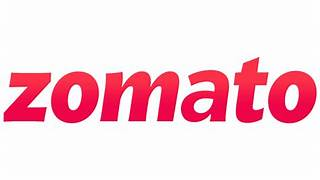

Zomato is a global platform that allows users to discover, review, and order food from local restaurants. Founded by Deepinder Goyal and Pankaj Chaddah in 2008 in Delhi, India, it was initially called FoodieBay before being rebranded to Zomato in 2010. Zomato operates by connecting customers with restaurants for food delivery, reservations, and reviews.The platform aims to simplify food discovery and provide seamless experiences for both users and restaurants. On a daily basis, Zomato handles food delivery operations, customer support, restaurant partnerships, and continuously upgrades its technology.

Here we are doing the thorough exploratory data analysis on Zomato Restaurants Data.

In [95]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df=pd.read_excel('Zomato_Data.xlsx')
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,300,1.0,2013_9_21
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,200,1.0,2016_9_10
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,Indian Rupees(Rs.),No,Yes,No,No,1,0,400,1.0,2018_9_25
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,100,1.0,2018_9_6
4,18415377,Sunil Punjabi Dhaba,1,New Delhi,"Main Vasant Kunj Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,150,1.0,2013_9_17


In [97]:
#Checking Structure and characterestics of data

df.shape

(9551, 20)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [99]:
print("Number of unique values in the columns")
for i in df.columns:
    print(i,":",df[i].nunique())

Number of unique values in the columns
RestaurantID : 9551
RestaurantName : 7433
CountryCode : 15
City : 141
Address : 8913
Locality : 1208
LocalityVerbose : 1265
Longitude : 8120
Latitude : 8677
Cuisines : 1825
Currency : 12
Has_Table_booking : 2
Has_Online_delivery : 2
Is_delivering_now : 2
Switch_to_order_menu : 1
Price_range : 4
Votes : 1012
Average_Cost_for_two : 140
Rating : 33
Datekey_Opening : 2889


In [100]:
df.isnull().sum()

,0
RestaurantID,0
RestaurantName,0
CountryCode,0
City,0
Address,0
Locality,0
LocalityVerbose,0
Longitude,0
Latitude,0
Cuisines,9


In [101]:
df.dropna(inplace=True)  #droppping cuisine nulls

In [102]:
df.shape

(9542, 20)

In [103]:
df.describe()

,RestaurantID,CountryCode,Longitude,Latitude,Price_range,Votes,Average_Cost_for_two,Rating
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1.804968,156.772060,1200.326137,2.890348
std,8.791967e+06,56.451600,41.197602,11.010094,0.905563,430.203324,16128.743876,1.128903
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,1.000000,5.000000,250.000000,2.500000
50%,6.002726e+06,1.000000,77.192031,28.570444,2.000000,31.000000,400.000000,3.200000
75%,1.835260e+07,1.000000,77.282043,28.642711,2.000000,130.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [104]:
df.describe(include='object')

,RestaurantName,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Datekey_Opening
count,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542
unique,7424,140,8905,1206,1263,1825,12,2,2,2,1,2889
top,Cafe Coffee Day,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,2010_7_14
freq,83,5473,11,122,122,936,8652,8384,7091,9508,9542,11


In [105]:
df.duplicated().sum()

0

In [106]:
cat_col = ['CountryCode','Price_range','Rating']
for i in cat_col:
    df[i] = df[i].astype('object')

df.describe(include='object')

,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Rating,Datekey_Opening
count,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542,9542.0,9542
unique,7424,15,140,8905,1206,1263,1825,12,2,2,2,1,4,33.0,2889
top,Cafe Coffee Day,1,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,No,1,1.0,2010_7_14
freq,83,8652,5473,11,122,122,936,8652,8384,7091,9508,9542,4438,2148.0,11


**Insights on Basic Structure and Characterestics of Data**

- The Zomato dataset contains **9,542 rows** and **21 columns** after dropping 9 rows of null cuisine values.
- No duplicate values are present.
- **Restaurant ID** is unique across the dataset.
- The dataset spans **15 countries**, **141 cities**, **9,542 restaurants** and includes **1,825 distinct cuisines**.
- **India** has the highest number of restaurants, with **Delhi** leading among cities.
- A large number of restaurants do not offer **online delivery** or **table booking**.

In [107]:
#Formatting columns as convenient with business needs

#Formatting date column from string to date

df['Datekey_Opening'] = pd.to_datetime(df['Datekey_Opening'],format='%Y_%m_%d')
df['Datekey_Opening']

,Datekey_Opening
0,2013-09-21
1,2016-09-10
2,2018-09-25
3,2018-09-06
4,2013-09-17
...,...
9546,2011-10-03
9547,2013-10-01
9548,2017-10-28
9549,2015-10-23


In [108]:
 country_df = pd.read_excel('Country-Code.xlsx')
 country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [109]:
country_df.shape

(15, 2)

In [110]:
df.shape

(9542, 20)

In [111]:
print(df.columns)
print(country_df.columns)

Index(['RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating', 'Datekey_Opening'],
      dtype='object')
Index(['Country Code', 'Country'], dtype='object')


In [112]:
#Adding country name based on the country code

df = pd.merge(df,country_df,left_on='CountryCode',right_on='Country Code')
df.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,Country Code,Country
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,...,No,No,No,1,0,300,1.0,2013-09-21,1,India
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,...,No,No,No,1,0,200,1.0,2016-09-10,1,India
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,...,Yes,No,No,1,0,400,1.0,2018-09-25,1,India
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,...,No,No,No,1,0,100,1.0,2018-09-06,1,India
4,18415377,Sunil Punjabi Dhaba,1,New Delhi,"Main Vasant Kunj Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,...,No,No,No,1,0,150,1.0,2013-09-17,1,India


In [113]:
# removing redundant columns

df.drop(['Country Code','CountryCode'],axis=1,inplace=True)
df.shape

(9542, 20)

In [114]:
df.columns

Index(['RestaurantID', 'RestaurantName', 'City', 'Address', 'Locality',
       'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Votes', 'Average_Cost_for_two',
       'Rating', 'Datekey_Opening', 'Country'],
      dtype='object')

In [115]:
#adding bucket ranges for average_cost_of_two

bins=[-np.inf,100,500,1000,1500,2000,np.inf]
labels=['<100','100-500','500-1000','1000-1500','1500-2000','>2000']
df['Avg_Cost_Bucket']=pd.cut(df['Average_Cost_for_two'],bins=bins,labels=labels)

In [116]:
#adding bucket ranges for Rating

bins=[0,1,2,3,4,5]
labels=['0-1','1-2','2-3','3-4','4-5']
df['Rating_Bucket']=pd.cut(df['Rating'],bins=bins,labels=labels)

In [117]:
# Normalizing the currency into Indian Rupees
exchange_rates = {
    'Indian Rupees(Rs.)': 1,      # INR is the base, so 1:1
    'Dollar($)': 74.85,           # Example: 1 USD = 74.85 INR
    'Pounds(Œ£)': 103.42,         # Example: 1 GBP = 103.42 INR
    'NewZealand($)': 50.56,       # Example: 1 NZD = 50.56 INR
    'Emirati Diram(AED)': 20.39,  # Example: 1 AED = 20.39 INR
    'Brazilian Real(R$)': 14.33,  # Example: 1 BRL = 14.33 INR
    'Turkish Lira(TL)': 8.52,     # Example: 1 TRY = 8.52 INR
    'Qatari Rial(QR)': 20.61,     # Example: 1 QAR = 20.61 INR
    'Rand(R)': 4.90,              # Example: 1 ZAR = 4.90 INR
    'Botswana Pula(P)': 6.93,     # Example: 1 BWP = 6.93 INR
    'Sri Lankan Rupee(LKR)': 0.37, # Example: 1 LKR = 0.37 INR
    'Indonesian Rupiah(IDR)': 0.0052 # Example: 1 IDR = 0.0052 INR
}

df['Amount_INR'] = df['Currency'].map(exchange_rates) * df['Average_Cost_for_two']

In [118]:
df.isna().sum()

,0
RestaurantID,0
RestaurantName,0
City,0
Address,0
Locality,0
LocalityVerbose,0
Longitude,0
Latitude,0
Cuisines,0
Currency,0


In [119]:
df.sample(8)

,RestaurantID,RestaurantName,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,...,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,Country,Avg_Cost_Bucket,Rating_Bucket,Amount_INR
4478,311022,Ashok Chaat Corner,New Delhi,"Shop 3488, Chowk Hauz Qazi, Near Chawri Bazar,...",Chawri Bazar,"Chawri Bazar, New Delhi",77.226874,28.649391,Street Food,Indian Rupees(Rs.),...,No,1,118,100,4.1,2017-08-05,India,<100,4-5,100.0
1975,18260641,Dilli BC,New Delhi,"M-58, Main Market, Greater Kailash (GK) 2, New...",Greater Kailash (GK) 2,"Greater Kailash (GK) 2, New Delhi",77.244520,28.533508,"North Indian, Mughlai",Indian Rupees(Rs.),...,No,2,267,700,4.1,2017-10-09,India,500-1000,4-5,700.0
1652,18317510,Trending Eats,New Delhi,"23,Sai Dhaam PG,Bungalow Road,Block UA,Jawahar...",Kamla Nagar,"Kamla Nagar, New Delhi",77.208495,28.679896,"Italian, Fast Food",Indian Rupees(Rs.),...,No,2,21,800,3.4,2013-09-10,India,500-1000,3-4,800.0
3590,7861,Angel's Basket,New Delhi,"C-152, Lajpat Nagar 2, New Delhi",Lajpat Nagar 2,"Lajpat Nagar 2, New Delhi",77.240358,28.571439,Bakery,Indian Rupees(Rs.),...,No,1,70,200,3.5,2016-08-19,India,100-500,3-4,200.0
20,18464641,Bala Ji Rasoi,New Delhi,"A-18, Naresh Park, Najafgarh Road, Nangloi, Ne...",Nangloi,"Nangloi, New Delhi",77.062471,28.675834,North Indian,Indian Rupees(Rs.),...,No,1,0,350,1.0,2012-08-09,India,100-500,0-1,350.0
4326,6453,Chinese Hut,New Delhi,"JD Block Market, Pitampura, New Delhi",Pitampura,"Pitampura, New Delhi",77.135753,28.701354,Chinese,Indian Rupees(Rs.),...,No,1,60,450,2.9,2017-07-18,India,100-500,2-3,450.0
9262,18340881,Barbeque Nation,Dubai,"G1, Villa, Near HQ Fitness, Near Lulu Mall, Ba...",Barsha 2,"Barsha 2, Dubai",55.215341,25.113380,"Indian, North Indian",Emirati Diram(AED),...,No,3,307,150,4.5,2010-08-24,UAE,100-500,4-5,3058.5
7826,18221572,Onesta,Bangalore,"501, Binnamangala Extension, 1st stage, C.M.H ...",Indiranagar,"Indiranagar, Bangalore",77.643685,12.978453,"Pizza, Cafe, Italian",Indian Rupees(Rs.),...,No,2,1413,600,4.3,2010-05-23,India,500-1000,4-5,600.0


In [120]:
df.columns

Index(['RestaurantID', 'RestaurantName', 'City', 'Address', 'Locality',
       'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Switch_to_order_menu', 'Price_range', 'Votes', 'Average_Cost_for_two',
       'Rating', 'Datekey_Opening', 'Country', 'Avg_Cost_Bucket',
       'Rating_Bucket', 'Amount_INR'],
      dtype='object')

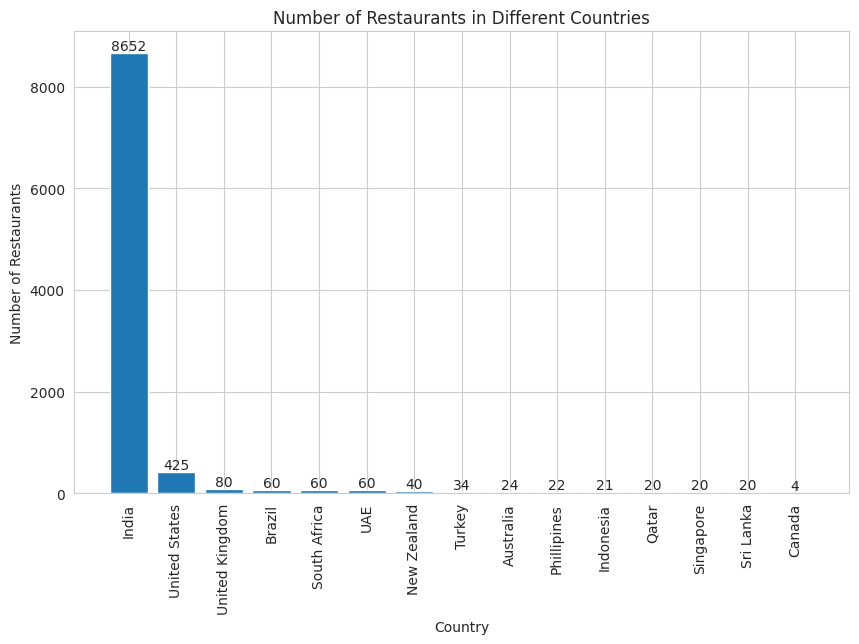

In [121]:
#Analysis

sns.set_style('whitegrid')
country_count = df.groupby('Country')['RestaurantID'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(country_count.index, country_count.values)
for i, v in enumerate(country_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in Different Countries')
plt.show()


India has more number of restaurants asscoiated, followed by United States and United Kingdom while canada, srilanka, singapore has lowest

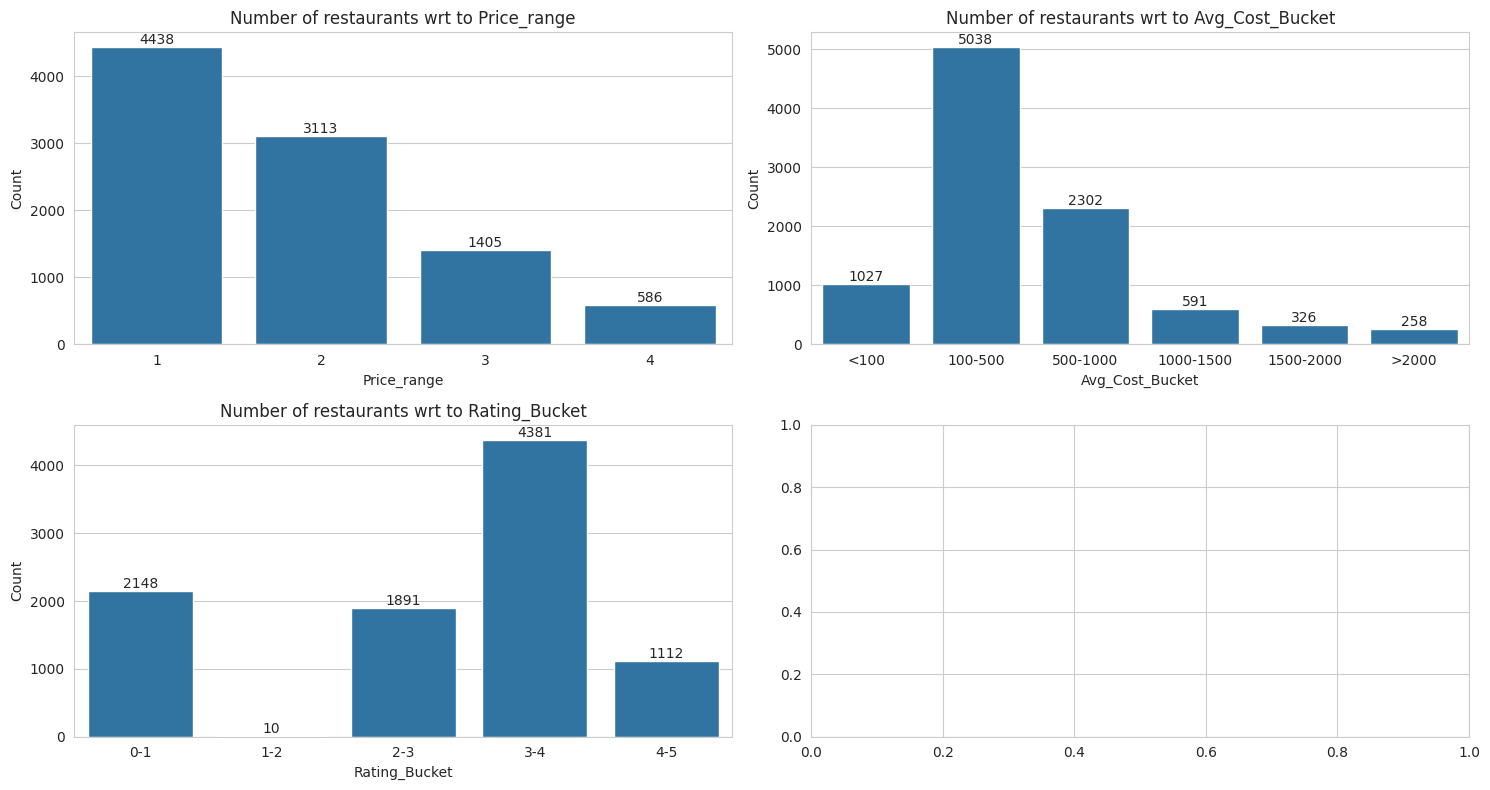

In [122]:
columns = ['Price_range','Avg_Cost_Bucket','Rating_Bucket']

fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
axes = axes.flatten()

for i,col in enumerate(columns):
    sns.countplot(x=col,data=df,ax=axes[i])
    axes[i].set_title(f'Number of restaurants wrt to {col}')
    for p in axes[i].patches:  # 'patches' are the bars in the plot
        axes[i].annotate(str(int(p.get_height())),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [123]:
df['Rating'].astype('float').describe()

,Rating
count,9542.000000
mean,2.890348
std,1.128903
min,1.000000
25%,2.500000
50%,3.200000
75%,3.700000
max,4.900000




*   More number of restaurants are in price range 1
*   More number of restaurants are in 100-500 avg_cost_bucket for two


*   The avg rating of the rating is 2.9 but the 50% of data are above 3. It shows the data is slightly left skewed and affected with lower rating values.





In [124]:
df.groupby('Amount_INR')['RestaurantID'].count().sort_values(ascending=False).head(10)

,RestaurantID
Amount_INR,
500.0,893
300.0,885
400.0,849
200.0,677
600.0,650
350.0,451
250.0,440
700.0,401
150.0,354


In [125]:
df['Rating'].mean()

2.890347935443305

In [126]:
df['Amount_INR'].describe()

,Amount_INR
count,9542.000000
mean,828.808091
std,1363.334457
min,0.000000
25%,300.000000
50%,500.000000
75%,800.000000
max,41580.000000




*   Average cost for a meal for 2 people is 500, whcih is 250 per person.
*   Mean is more than median and 75% of data is <= 800 where max is 41,580. It
    clearly suggests the data is right skewed and has many outliers.


*   The maximum and the last quartile is very high. The further investigation can be done about the high cost of meal.





In [127]:
df.groupby('Country')['Rating'].mean().sort_values(ascending=False)

,Rating
Country,
Phillipines,4.468182
Turkey,4.3
Indonesia,4.295238
New Zealand,4.2625
UAE,4.233333
South Africa,4.21
United Kingdom,4.1
Qatar,4.06
United States,4.014353




*   Indian Restaurants has the lowest rating, while the phillipines has highest.This can be further checked for potential reasons.

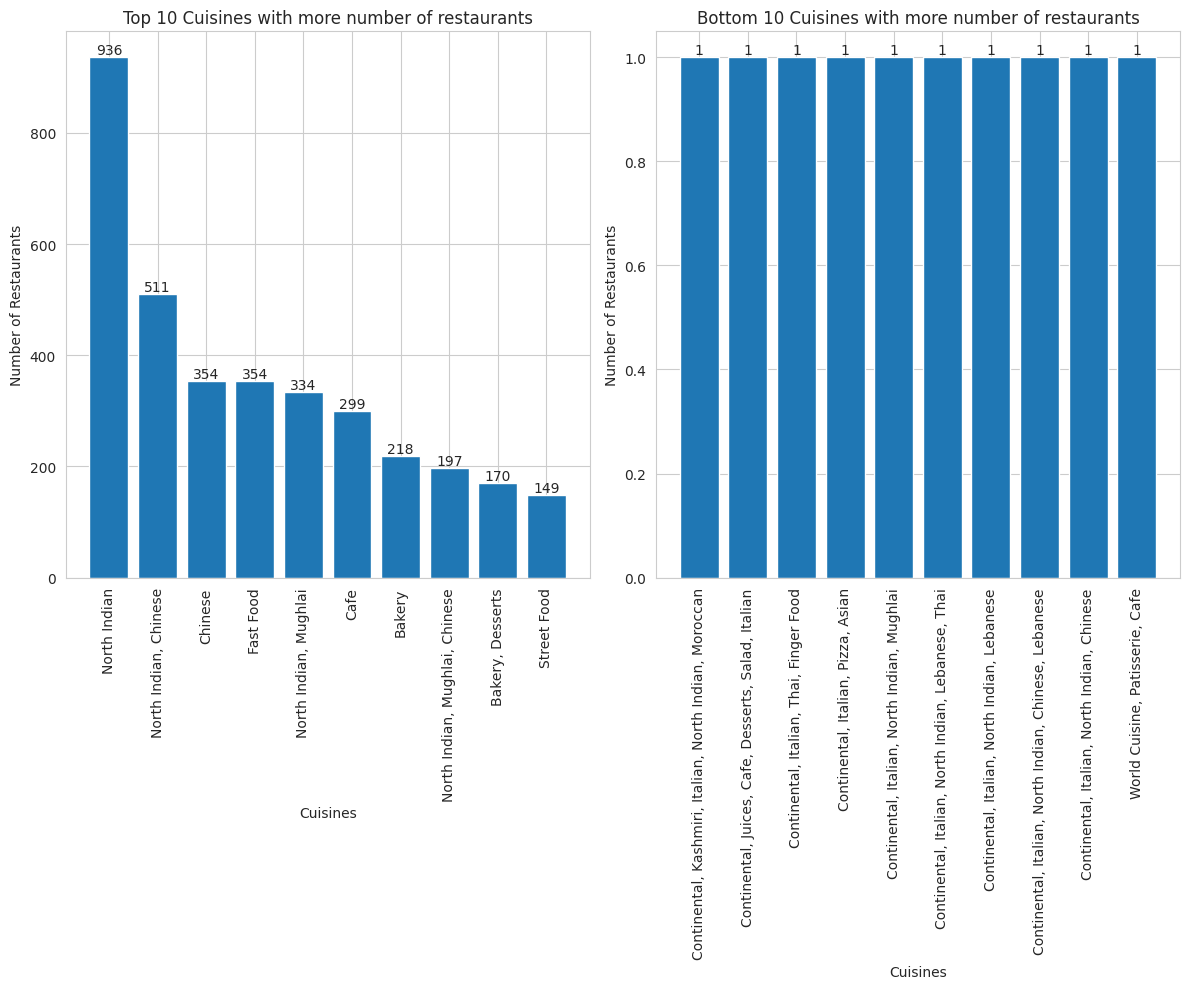

In [128]:
# Create a 2x1 grid for subplots (one row, two column)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Top 10 cuisines
cuisines_count_top = df.groupby('Cuisines')['RestaurantID'].count().sort_values(ascending=False).head(10)
axes[0].bar(cuisines_count_top.index, cuisines_count_top.values)
axes[0].set_title('Top 10 Cuisines with more number of restaurants')
axes[0].set_xlabel('Cuisines')
axes[0].set_ylabel('Number of Restaurants')
axes[0].tick_params(axis='x', rotation=90)

# Add value labels on top of the bars for top 10
for i, v in enumerate(cuisines_count_top.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom')

# Bottom 10 cuisines
cuisines_count_bottom = df.groupby('Cuisines')['RestaurantID'].count().sort_values(ascending=False).tail(10)
axes[1].bar(cuisines_count_bottom.index, cuisines_count_bottom.values)
axes[1].set_title('Bottom 10 Cuisines with more number of restaurants')
axes[1].set_xlabel('Cuisines')
axes[1].set_ylabel('Number of Restaurants')
axes[1].tick_params(axis='x', rotation=90)

# Add value labels on top of the bars for bottom 10
for i, v in enumerate(cuisines_count_bottom.values):
    axes[1].text(i, v, str(v), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the combined figure with two bar charts
plt.show()


As anticipated, with 90% of the restaurants being Indian, North Indian, Chinese, Fast Food, and North Indian Mughlai cuisines dominate the offerings, while Continental, Italian, Kashmiri, and Moroccan cuisines are less frequently available.

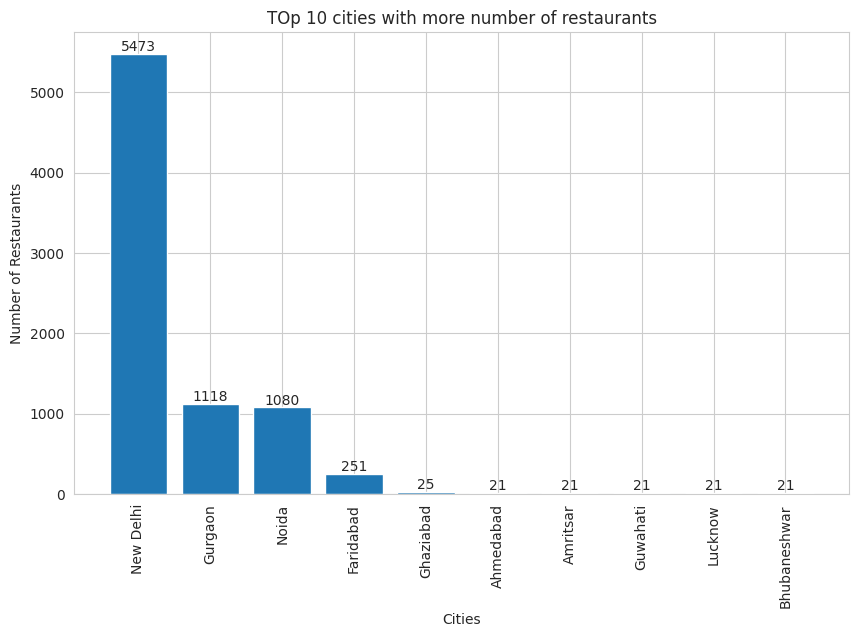

In [129]:
city_count = df.groupby('City')['RestaurantID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(city_count.index, city_count.values)
for i, v in enumerate(city_count.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Cities')
plt.xticks(rotation=90)
plt.ylabel('Number of Restaurants')
plt.title('TOp 10 cities with more number of restaurants')
plt.show()



New Delhi has more number of restaurants associated followed by Gurgaon, Noida

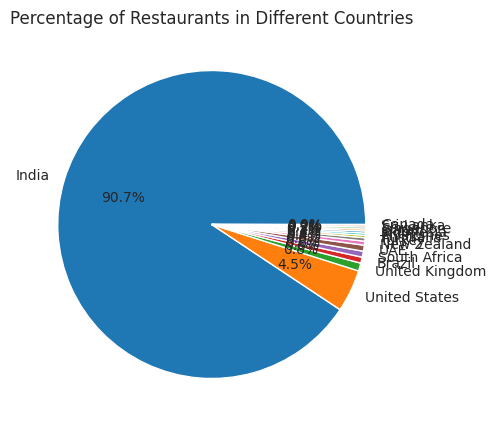

In [130]:
plt.figure(figsize=(10, 5))
plt.pie(country_count,labels=country_count.index,autopct='%0.1f%%')
plt.title('Percentage of Restaurants in Different Countries')
plt.show()

India clearly dominates with highest number of restaurants(90,7%) followed by United States(4.5%)

In [131]:
df.groupby(['Country','Has_Online_delivery'])['RestaurantID'].count()

Country         Has_Online_delivery
Australia       No                       24
Brazil          No                       60
Canada          No                        4
India           No                     6229
                Yes                    2423
Indonesia       No                       21
New Zealand     No                       40
Phillipines     No                       22
Qatar           No                       20
Singapore       No                       20
South Africa    No                       60
Sri Lanka       No                       20
Turkey          No                       34
UAE             No                       32
                Yes                      28
United Kingdom  No                       80
United States   No                      425
Name: RestaurantID, dtype: int64

Has_Online_delivery
No     7091
Yes    2451
Name: RestaurantID, dtype: int64


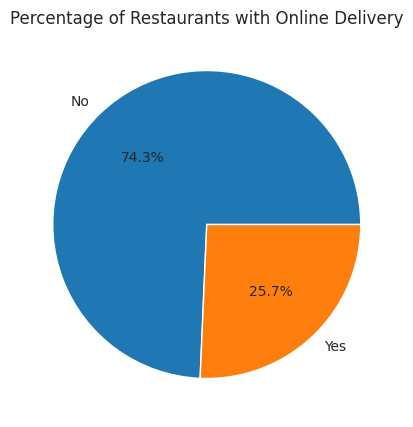

In [132]:
online_delivery = df.groupby('Has_Online_delivery')['RestaurantID'].count()
print(online_delivery)
plt.figure(figsize=(10, 5))
plt.pie(online_delivery,labels=online_delivery.index,autopct='%0.1f%%')
plt.title('Percentage of Restaurants with Online Delivery')
plt.show()

In [133]:
df.groupby(['Country','Has_Table_booking'])['RestaurantID'].count()

Country         Has_Table_booking
Australia       No                     24
Brazil          No                     60
Canada          No                      4
India           No                   7541
                Yes                  1111
Indonesia       No                     21
New Zealand     No                     40
Phillipines     No                      8
                Yes                    14
Qatar           No                     19
                Yes                     1
Singapore       No                     20
South Africa    No                     58
                Yes                     2
Sri Lanka       No                     20
Turkey          No                     34
UAE             No                     42
                Yes                    18
United Kingdom  No                     68
                Yes                    12
United States   No                    425
Name: RestaurantID, dtype: int64

Has_Table_booking
No     8384
Yes    1158
Name: RestaurantID, dtype: int64


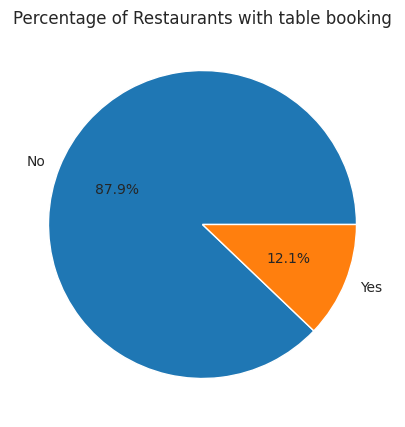

In [134]:
table_booking = df.groupby('Has_Table_booking')['RestaurantID'].count()
print(table_booking)
plt.figure(figsize=(10, 5))
plt.pie(table_booking,labels=online_delivery.index,autopct='%0.1f%%')
plt.title('Percentage of Restaurants with table booking')
plt.show()

In [135]:
df.groupby(['Country','Is_delivering_now'])['RestaurantID'].count()

Country         Is_delivering_now
Australia       No                     24
Brazil          No                     60
Canada          No                      4
India           No                   8618
                Yes                    34
Indonesia       No                     21
New Zealand     No                     40
Phillipines     No                     22
Qatar           No                     20
Singapore       No                     20
South Africa    No                     60
Sri Lanka       No                     20
Turkey          No                     34
UAE             No                     60
United Kingdom  No                     80
United States   No                    425
Name: RestaurantID, dtype: int64

Is_delivering_now
No     9508
Yes      34
Name: RestaurantID, dtype: int64


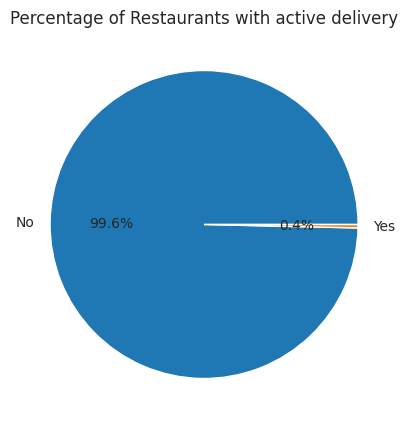

In [136]:
is_delivery = df.groupby('Is_delivering_now')['RestaurantID'].count()
print(is_delivery)
plt.figure(figsize=(10, 5))
plt.pie(is_delivery,labels=is_delivery.index,autopct='%0.1f%%')
plt.title('Percentage of Restaurants with active delivery')
plt.show()



*  **Online delivery** is available in a limited number of restaurants, exclusively in **India and the UAE**, with active delivery services only operating in India. **Table booking** is offered in a few restaurants across **India, the Philippines, Qatar, South Africa, the UAE, and the United Kingdom**.


In [35]:
df.groupby('Country')['Votes'].sum().sort_values(ascending=False).head(10)

,Votes
Country,
India,1187163
United States,183122
UAE,29611
South Africa,18910
United Kingdom,16439
Indonesia,16214
Turkey,14670
New Zealand,9721
Phillipines,8963


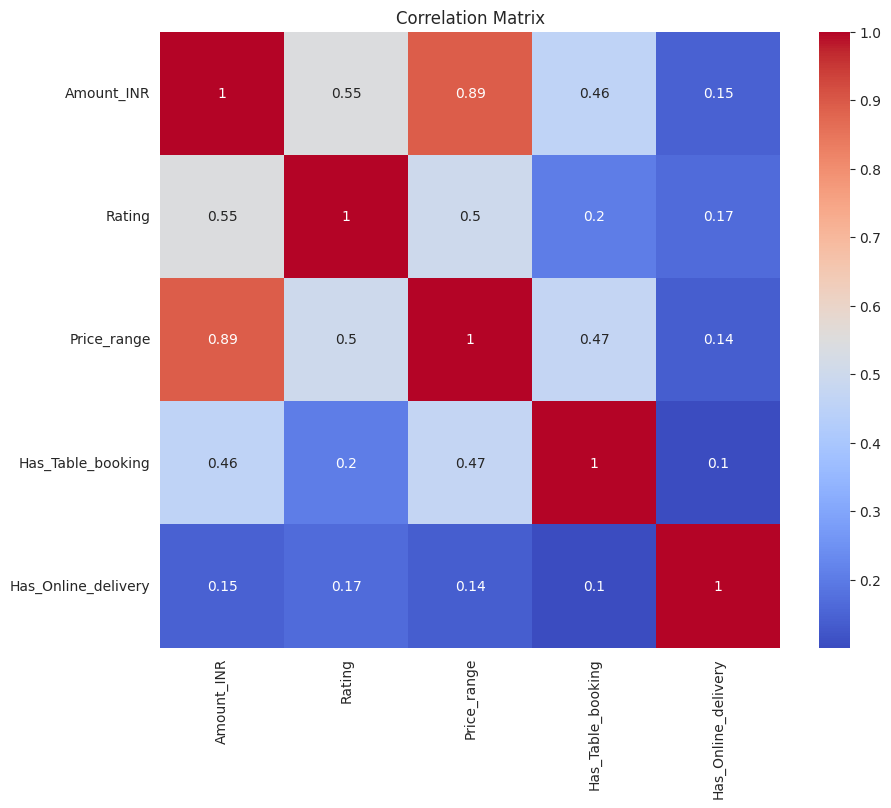

In [138]:
# Convert 'Yes' and 'No' values to 1 and 0 for correlation calculation
df['Has_Table_booking'] = df['Has_Table_booking'].map({'Yes': 1, 'No': 0})
df['Has_Online_delivery'] = df['Has_Online_delivery'].map({'Yes': 1, 'No': 0})

corr = df[['Amount_INR','Rating','Price_range','Has_Table_booking', 'Has_Online_delivery']].corr(method='spearman')

plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(corr, annot=True, cmap='coolwarm') # Create the heatmap with annotations
plt.title('Correlation Matrix') # Set the title of the plot
plt.show()



*   The price_range and Amount_INR are highly correlated.
*   Rating and Table booking affecting the average amount, price_range positively.


*   Online delivery doesn't have much impact with other factors





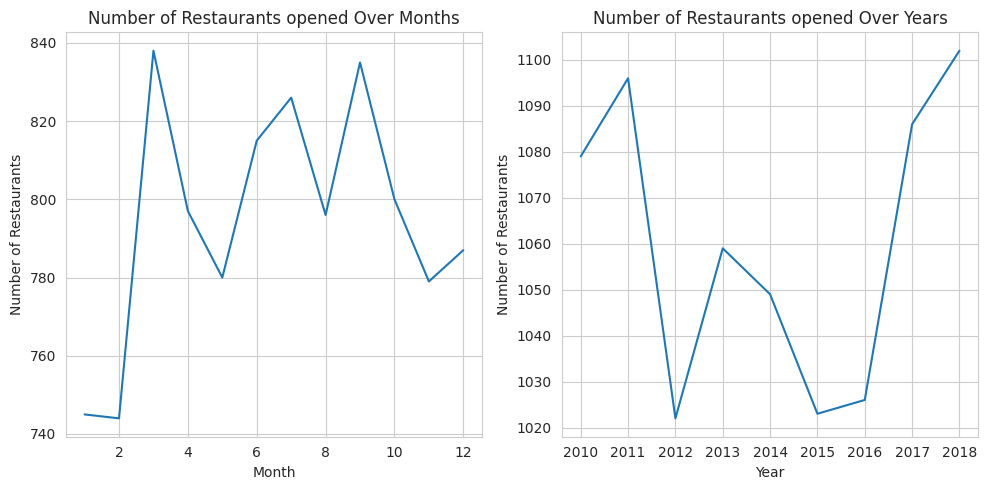

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes = axes.flatten()

monthly_counts = df.groupby(df['Datekey_Opening'].dt.month)['RestaurantID'].count()
axes[0].plot(monthly_counts.index,monthly_counts.values)
axes[0].set_title('Number of Restaurants opened Over Months')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Restaurants')

yearly_counts = df.groupby(df['Datekey_Opening'].dt.year)['RestaurantID'].count()
axes[1].plot(yearly_counts.index,yearly_counts.values)
axes[1].set_title('Number of Restaurants opened Over Years')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Restaurants')

plt.tight_layout()
plt.show()



*   Many restaurants open in March and September.
*   Despite some fluctuations in the number of restaurant openings over the years, there has been a positive trend since 2015, with significant peaks in 2018.





<Figure size 1200x1200 with 0 Axes>

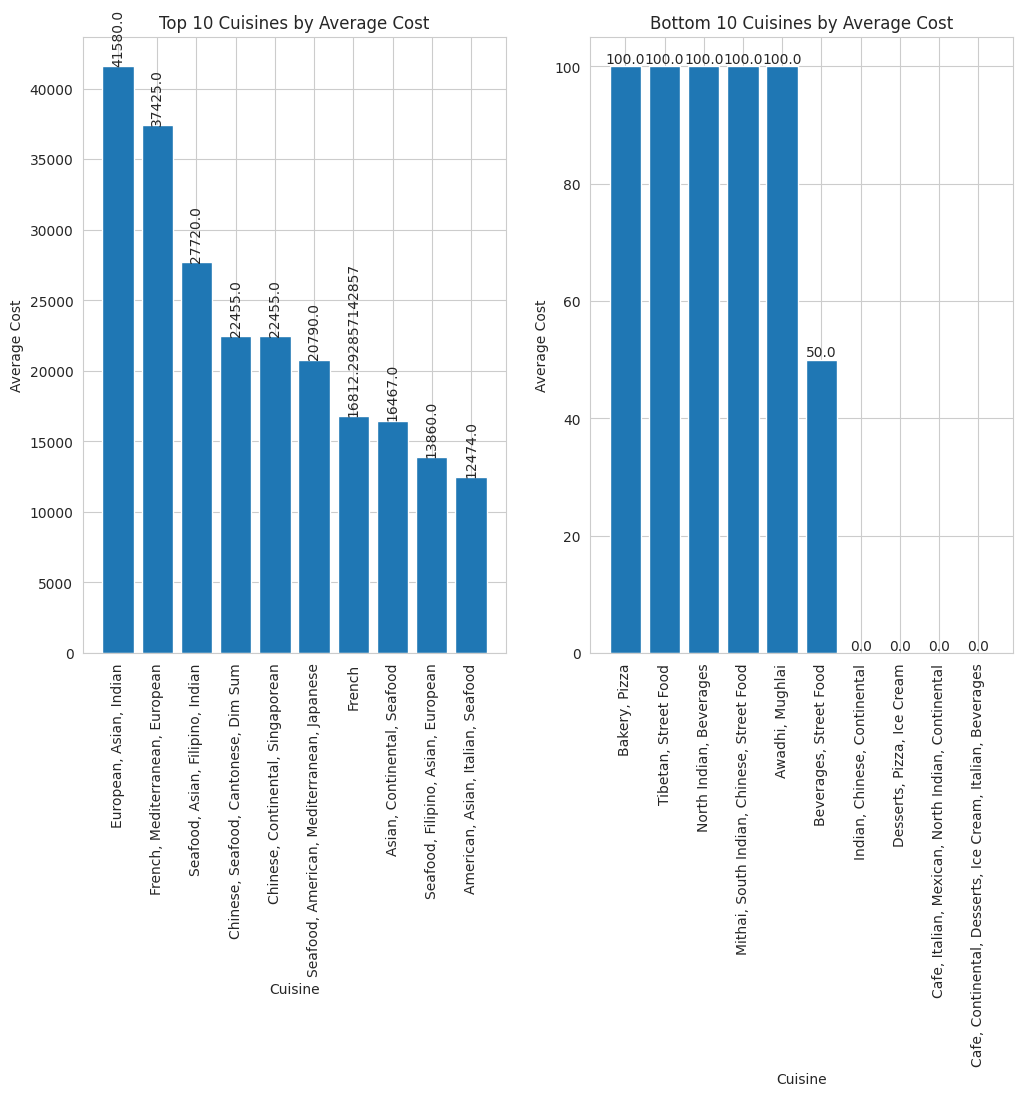

In [47]:
plt.figure(figsize=(12,12))
plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
topcuisines = df.groupby('Cuisines')['Amount_INR'].mean().sort_values(ascending=False).head(10)
plt.bar(topcuisines.index,topcuisines.values)
for i, v in enumerate(topcuisines.values):
    plt.text(i, v, str(v), ha='center', va='bottom',rotation=90)
plt.title('Top 10 Cuisines by Average Cost')
plt.xlabel('Cuisine')
plt.xticks(rotation=90)
plt.ylabel('Average Cost')

plt.subplot(1,2,2)
bottomcuisines = df.groupby('Cuisines')['Amount_INR'].mean().sort_values(ascending=False).tail(10)
plt.bar(bottomcuisines.index,bottomcuisines.values)
for i, v in enumerate(bottomcuisines.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('Bottom 10 Cuisines by Average Cost')
plt.xlabel('Cuisine')
plt.xticks(rotation=90)
plt.ylabel('Average Cost')

plt.show()

The cuisines can be further investigated/granularized to which is the major costlier/ demanding one

<Figure size 1200x1200 with 0 Axes>

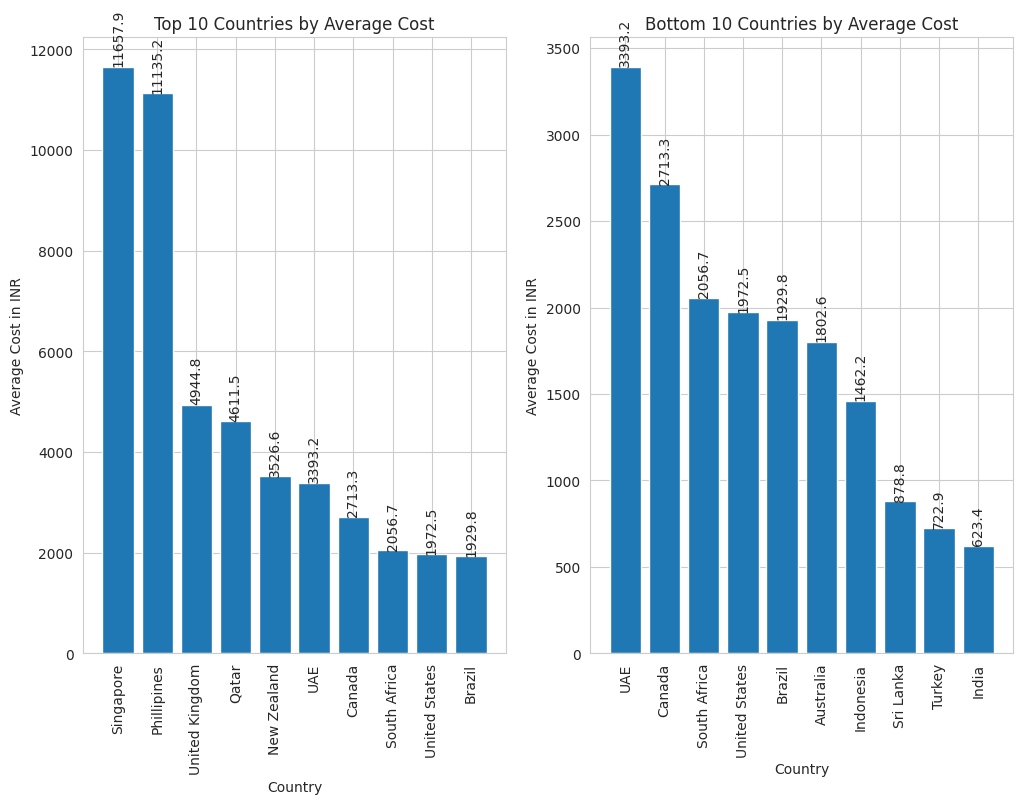

In [50]:
plt.figure(figsize=(12,12))
plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
topCountries = df.groupby('Country')['Amount_INR'].mean().sort_values(ascending=False).head(10)
plt.bar(topCountries.index,topCountries.values)
for i, v in enumerate(topCountries.values):
    plt.text(i, v, f'{v:.1f}', ha='center', va='bottom',rotation=90)
plt.title('Top 10 Countries by Average Cost')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Average Cost in INR')

plt.subplot(1,2,2)
bottomCountries = df.groupby('Country')['Amount_INR'].mean().sort_values(ascending=False).tail(10)
plt.bar(bottomCountries.index,bottomCountries.values)
for i, v in enumerate(bottomCountries.values):
    plt.text(i, v,f'{v:.1f}', ha='center', va='bottom',rotation=90)
plt.title('Bottom 10 Countries by Average Cost')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Average Cost in INR')

plt.show()

India has relatively lowest average cost for food while Phillipines, Singapore is costlier. Is it due to quality or cuisine issues can be investigated further